# EDA 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 


#  Homicidios

In [13]:
homicidios_victimas = pd.DataFrame(homicidios_victimas)
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [14]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


* Identifico la cantidad de comunas que existen

In [15]:
cantidad_de_comunas = homicidios_hechos['COMUNA'].nunique()
cantidad_de_comunas

16

* Identifico las comunas con más victimas 


In [16]:
siniestros_por_comuna = homicidios_hechos['COMUNA'].value_counts()
siniestros_por_comuna

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

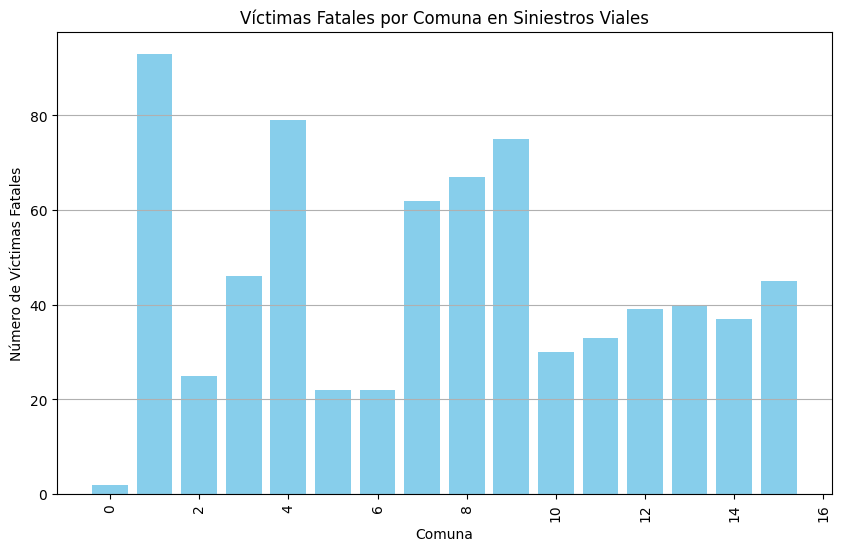

In [18]:
# Agrupamos por comuna y sumamos las víctimas fatales
victimas_por_comuna = homicidios_hechos.groupby('COMUNA')['N_VICTIMAS'].sum()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(victimas_por_comuna.index, victimas_por_comuna.values, color='skyblue')
plt.xlabel('Comuna')
plt.ylabel('Número de Víctimas Fatales')
plt.title('Víctimas Fatales por Comuna en Siniestros Viales')
plt.xticks(rotation= 90)  # Rotamos las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Agregamos una cuadrícula en el eje y
plt.show()

* La comuna con más victimas es la comuna N°1 que corresponde a los barrios de Retiro, San Nicolás, Monserrat, Constitución, San Telmo y Puerto Madero.

* Ahora voy a hacer una diferenciación por rango hetario y por sexo

In [25]:
print(homicidios_victimas['EDAD'].dtype)


object


In [28]:

import numpy as np

# Reemplazar "SD" con NaN en la columna 'EDAD'
homicidios_victimas['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'], errors='coerce')

# Ahora puedes convertir la columna 'EDAD' a enteros, ignorando los valores NaN
homicidios_victimas['EDAD'] = homicidios_victimas['EDAD'].astype('Int64')



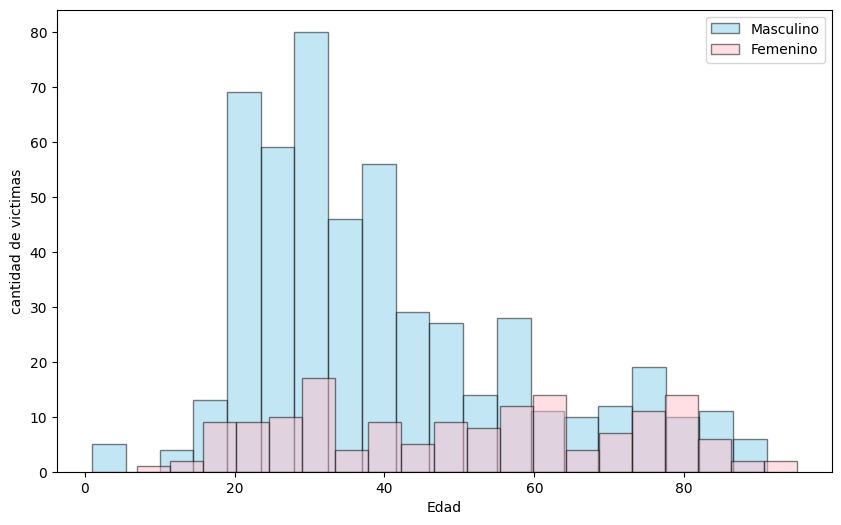

In [33]:
# Filtrar por sexo masculino
Victimas_Masculinas = homicidios_victimas[homicidios_victimas['SEXO'] == 'MASCULINO']
#Filtrar por sexo femenino
Victimas_Femeninas = homicidios_victimas[homicidios_victimas['SEXO'] == 'FEMENINO']
#Crear histograma separado por sexo

plt.figure(figsize=(10,6))
plt.hist(Victimas_Masculinas['EDAD'],bins=20, color= 'skyblue',edgecolor='black',alpha=0.5,label='Masculino')
plt.hist(Victimas_Femeninas['EDAD'],bins=20,color='pink',edgecolor='black',alpha=0.5,label='Femenino')
plt.title=('Distribución de edades de las victimas fatales por sexo')
plt.xlabel('Edad')
plt.ylabel('cantidad de victimas')
plt.legend()
plt.grid(False)
plt.show()

* Voy a profundizar el análisis en la comuna 1

In [19]:
tipos_de_calle = homicidios_hechos['TIPO_DE_CALLE'].value_counts()
tipos_de_calle

TIPO_DE_CALLE
AVENIDA      429
CALLE        136
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64

In [20]:
# Filtra los datos para la comuna 1
df_comuna1 = homicidios_hechos[homicidios_hechos['COMUNA'] == 1]

# Cuenta los incidentes por tipo de calle
incidentes_por_tipo = df_comuna1['TIPO_DE_CALLE'].value_counts()

incidentes_por_tipo


TIPO_DE_CALLE
AVENIDA      56
CALLE        23
AUTOPISTA    11
Name: count, dtype: int64

* Podemos observar que la mayoría de incidentes se han producido en avenidas


* Voy a hacer algunas transformaciones de datos para poder analizar qué dias y en qué horarios han ocurrido estos accidentes

C:\Users\pocal\AppData\Local\Temp\ipykernel_1996\1976922804.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna_1['FECHA'] = pd.to_datetime(df_comuna_1['FECHA'])
C:\Users\pocal\AppData\Local\Temp\ipykernel_1996\1976922804.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna_1['DIA_DE_LA_SEMANA'] = df_comuna_1['FECHA'].dt.dayofweek
C:\Users\pocal\AppData\Local\Temp\ipykernel_1996\1976922804.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

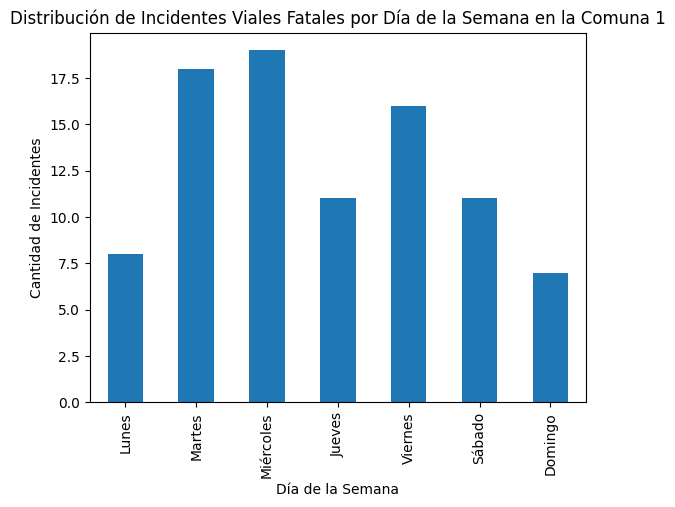

In [21]:
# Filtrar el DataFrame para incluir solo los incidentes en la comuna 1
df_comuna_1 = homicidios_hechos[homicidios_hechos['COMUNA'] == 1]

# Convierte la columna 'FECHA' a formato datetime si aún no lo está
df_comuna_1['FECHA'] = pd.to_datetime(df_comuna_1['FECHA'])

# Agrega una nueva columna 'DIA_DE_LA_SEMANA' que contenga el día de la semana
df_comuna_1['DIA_DE_LA_SEMANA'] = df_comuna_1['FECHA'].dt.dayofweek

# Mapea los números de día de la semana a los nombres de los días
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_comuna_1['DIA_DE_LA_SEMANA'] = df_comuna_1['DIA_DE_LA_SEMANA'].map(dias_semana)

# Contar la cantidad de incidentes por día de la semana
incidentes_por_dia = df_comuna_1['DIA_DE_LA_SEMANA'].value_counts()

# Ordenar los días de la semana en orden lógico
incidentes_por_dia = incidentes_por_dia.reindex(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])

# Graficar la distribución de incidentes por día de la semana
incidentes_por_dia.plot(kind='bar')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Incidentes')
plt.title('Distribución de Incidentes Viales Fatales por Día de la Semana en la Comuna 1')
plt.show()


* Es llamativo que la mayor cantidad de incidentes se produzcan los días miércoles.

* Tráfico de mitad de semana: El miércoles es el día en el que las personas ya han superado el comienzo de la semana laboral y aún no han llegado al final de la misma. Esto podría generar un mayor flujo de tráfico en comparación con los días de inicio o fin de semana, lo que aumenta las posibilidades de accidentes.

* Fatiga y estrés: A mitad de semana, las personas pueden estar más fatigadas o estresadas debido a las demandas laborales y personales acumuladas durante los primeros días de la semana. Esto puede llevar a una menor atención al conducir y a un aumento de los errores humanos, lo que contribuye a los incidentes viales.

* Actividades de mantenimiento: En algunas ciudades, las autoridades pueden programar actividades de mantenimiento vial o reparaciones en carreteras durante la mitad de la semana, lo que puede provocar cierres de carriles o cambios en las condiciones de conducción que aumenten el riesgo de incidentes.

* Comportamiento del conductor: La percepción de que ya se ha superado la mitad de la semana puede llevar a un comportamiento más relajado o menos cauteloso por parte de algunos conductores, lo que aumenta la posibilidad de comportamientos imprudentes en la carretera.

C:\Users\pocal\AppData\Local\Temp\ipykernel_1996\2539309358.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comuna_1_miercoles['HORA'] = pd.to_datetime(df_comuna_1_miercoles['HORA'], format='%H:%M:%S').dt.hour


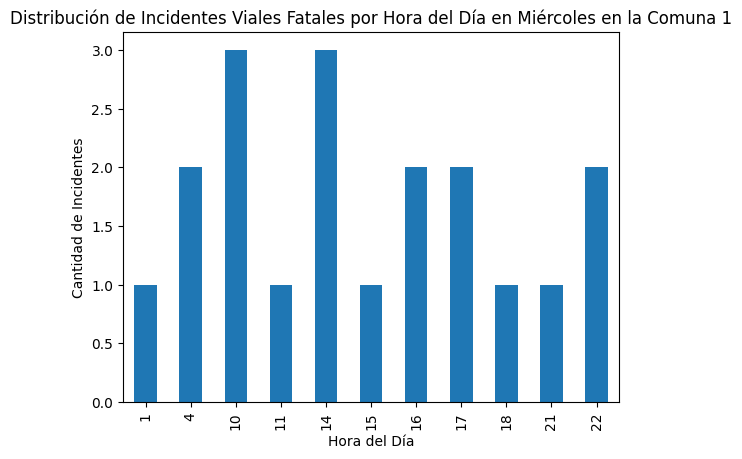

In [22]:
# Filtrar el DataFrame para incluir solo los incidentes en la comuna 1 y en miércoles
df_comuna_1_miercoles = homicidios_hechos[(homicidios_hechos['COMUNA'] == 1) & (homicidios_hechos['FECHA'].dt.dayofweek == 2)]

# Convierte la columna 'HORA' a formato datetime si aún no lo está
df_comuna_1_miercoles['HORA'] = pd.to_datetime(df_comuna_1_miercoles['HORA'], format='%H:%M:%S').dt.hour

# Contar la cantidad de incidentes por hora del día
incidentes_por_hora = df_comuna_1_miercoles['HORA'].value_counts()

# Ordenar las horas en orden ascendente
incidentes_por_hora = incidentes_por_hora.sort_index()

# Graficar la distribución de incidentes por hora del día
incidentes_por_hora.plot(kind='bar')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Incidentes')
plt.title('Distribución de Incidentes Viales Fatales por Hora del Día en Miércoles en la Comuna 1')
plt.show()


* Viendo los horarios en los que se producen estos accidentes puedo deducir que algunos motivos pueden ser:
* * Apertura de museos y galerías de arte: Esto podría atraer a turistas y residentes locales a áreas específicas de la ciudad, lo que aumentaría el tráfico y, por lo tanto, la probabilidad de incidentes viales en esas zonas.

* * Inicio de clases en instituciones educativas: Las horas de entrada y salida de las escuelas pueden generar congestión de tráfico en las áreas cercanas, especialmente si hay padres llevando a sus hijos en automóvil.

* * Horario de apertura de oficinas gubernamentales y comercios: Esto podría aumentar la actividad en las calles y, por lo tanto, el número de vehículos en circulación, lo que potencialmente aumenta el riesgo de accidentes.

* * Celebración de ferias o mercados callejeros: Estos eventos pueden atraer a una gran cantidad de personas y vehículos a áreas específicas de la ciudad, lo que podría aumentar la posibilidad de congestión vial y, en consecuencia, de accidentes.

* * Inicio de eventos deportivos: Los eventos deportivos, especialmente aquellos que atraen a grandes multitudes, pueden generar congestión en las vías de acceso y estacionamiento cercanas, lo que aumenta el riesgo de accidentes.

* * Horario de almuerzo en restaurantes y cafeterías: El aumento de la actividad en las calles durante la hora del almuerzo puede aumentar el tráfico y, por lo tanto, la probabilidad de incidentes viales, especialmente en áreas comerciales y de negocios.


* Voy a averiguar cuál es la comuna 0

In [23]:
filas_comuna_0 = homicidios_hechos[homicidios_hechos['COMUNA'] == 0]
filas_comuna_0

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD


* La comuna 0 son dos entradas en las que no se obtienen muchos datos, podría eliminarla

Voy a averiguar el rango etario y el sexo de las victimas

## Si comparo estos datos con lesiones, llegaré a la misma conclusión?

# Lesiones
